### ML ASSISTED CLASSIFICATION OF LATERITE MATERIAL BASED ON GEOTECHNICAL PROPERTIES

In [1]:

#For data handling and preprocessing
import pandas as pd
import numpy as np
import random 

#For visualization
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline 

#For scaling dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Models from Scikit-Learn



In [2]:
dataset = pd.read_csv("lateritelarge.csv")
dataset.head(100)

,Laterite Type,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
0,ILT,0.75,15.00,2.66,2.08,2525,1.61,2.18,32
1,LT,5.00,9.50,1.90,1.55,2228,2.05,3.91,24
2,LTC,8.00,5.09,0.90,0.86,1437,1.87,4.76,16
3,LLT,15.00,22.65,3.22,2.81,3002,3.20,1.74,35
4,ILT,1.25,14.89,2.27,1.75,2298,1.77,2.00,35
...,...,...,...,...,...,...,...,...,...
95,ILT,13.63,15.17,1.46,0.74,2032,1.64,3.42,15
96,LT,2.66,8.48,2.48,2.47,2757,3.12,3.55,45
97,LT,10.22,13.63,1.29,2.32,1746,2.71,1.60,33
98,LLT,8.40,22.66,3.13,1.89,3082,1.52,4.66,21


In [3]:
dataset.shape

(5050, 9)

In [4]:
dataset.isnull().sum()

Laterite Type    0
Ds               0
UCS              0
IS50             0
TS               0
Pw               0
Di               0
Mc               0
RQD              0
dtype: int64

In [5]:
class_counts = dataset['Laterite Type'].value_counts()
print("\nCount of each class:")
print(class_counts)


Count of each class:
Laterite Type
ILT    1288
LTC    1269
LLT    1265
LT     1228
Name: count, dtype: int64


In [6]:
dataset.describe()

,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
count,5050.000000,5050.000000,5050.00000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,10.142471,14.216707,1.89417,1.651796,2303.599802,2.508362,3.226505,30.071881
std,5.599407,6.359251,0.91324,0.782217,516.872649,0.575371,0.998645,11.731624
min,0.500000,3.000000,0.30000,0.300000,1401.000000,1.500000,1.500000,10.000000
25%,5.280000,8.660000,1.11000,0.980000,1865.000000,2.010000,2.370000,20.000000
50%,10.220000,14.325000,1.89000,1.640000,2306.500000,2.510000,3.220000,30.000000
75%,14.937500,19.767500,2.65000,2.340000,2746.000000,3.020000,4.060000,40.000000
max,20.000000,25.000000,3.50000,3.000000,3200.000000,3.500000,5.000000,50.000000


In [7]:
dataset = dataset.replace({'Laterite Type': {'ILT': 1, 'LT': 2, 'LTC': 3, 'LLT': 4}})

C:\Users\Vijay Kumar\AppData\Local\Temp\ipykernel_4788\2903027459.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'Laterite Type': {'ILT': 1, 'LT': 2, 'LTC': 3, 'LLT': 4}})


In [8]:

#converting Categorical datatype of Laterite type into numerical ttype

ILT =1
LT=2
LTC=3
LLT=4

In [9]:
dataset.head(5)

,Laterite Type,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
0,1,0.75,15.00,2.66,2.08,2525,1.61,2.18,32
1,2,5.00,9.50,1.90,1.55,2228,2.05,3.91,24
2,3,8.00,5.09,0.90,0.86,1437,1.87,4.76,16
3,4,15.00,22.65,3.22,2.81,3002,3.20,1.74,35
4,1,1.25,14.89,2.27,1.75,2298,1.77,2.00,35


In [10]:
dataset1=dataset.head(100)
dataset1

,Laterite Type,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
0,1,0.75,15.00,2.66,2.08,2525,1.61,2.18,32
1,2,5.00,9.50,1.90,1.55,2228,2.05,3.91,24
2,3,8.00,5.09,0.90,0.86,1437,1.87,4.76,16
3,4,15.00,22.65,3.22,2.81,3002,3.20,1.74,35
4,1,1.25,14.89,2.27,1.75,2298,1.77,2.00,35
...,...,...,...,...,...,...,...,...,...
95,1,13.63,15.17,1.46,0.74,2032,1.64,3.42,15
96,2,2.66,8.48,2.48,2.47,2757,3.12,3.55,45
97,2,10.22,13.63,1.29,2.32,1746,2.71,1.60,33
98,4,8.40,22.66,3.13,1.89,3082,1.52,4.66,21


In [11]:
x=dataset.iloc[1:]

In [12]:
y=dataset["Laterite Type"]

In [13]:
from sklearn.preprocessing import StandardScaler

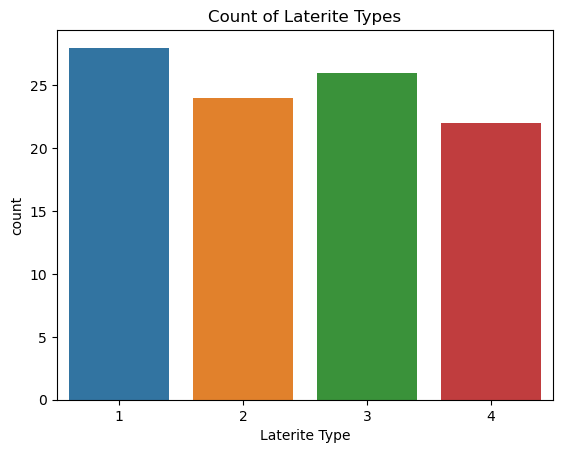

In [14]:
sns.countplot(x=dataset1["Laterite Type"])
plt.title("Count of Laterite Types")
plt.savefig("plot1.png")


plt.show()

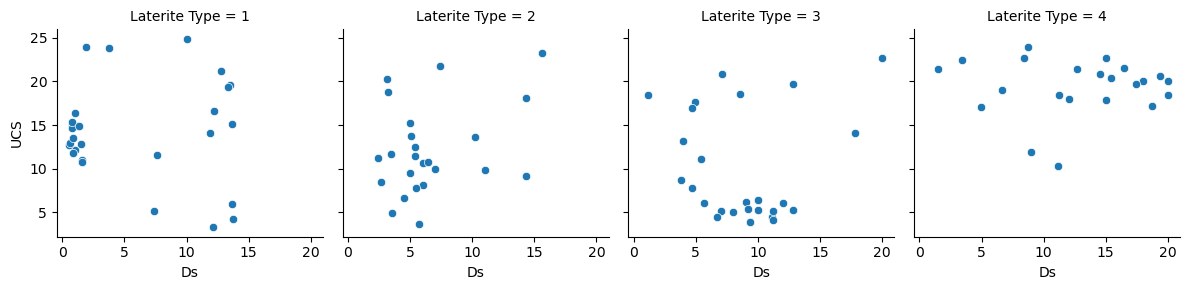

In [15]:
g = sns.FacetGrid(dataset1, col='Laterite Type')
g.map(sns.scatterplot, 'Ds', 'UCS')
plt.savefig("plot2.png")
plt.show()

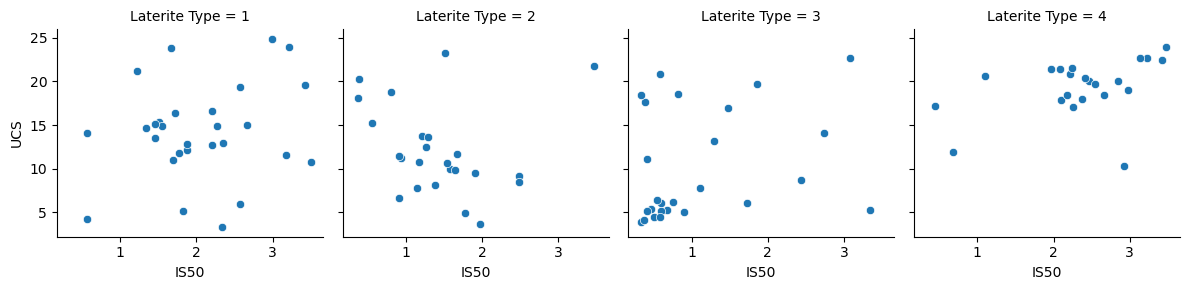

In [16]:
g = sns.FacetGrid(dataset1, col='Laterite Type')
g.map(sns.scatterplot, 'IS50', 'UCS')
plt.savefig("plot.png")
plt.show()

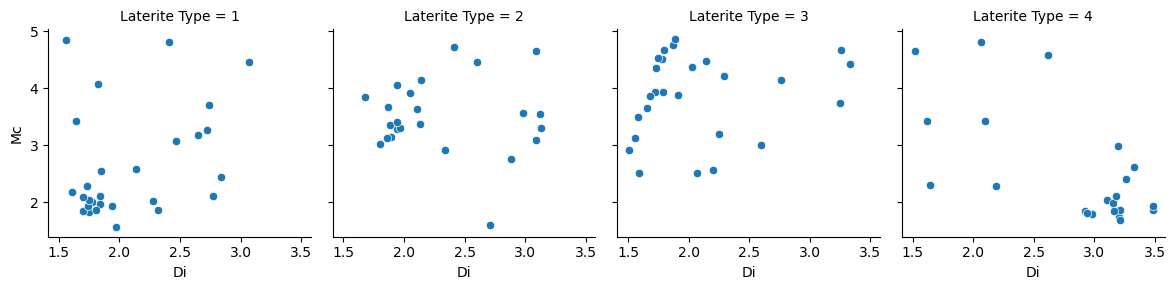

In [17]:
g = sns.FacetGrid(dataset1, col='Laterite Type')
g.map(sns.scatterplot, 'Di', 'Mc')
plt.show()

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wi

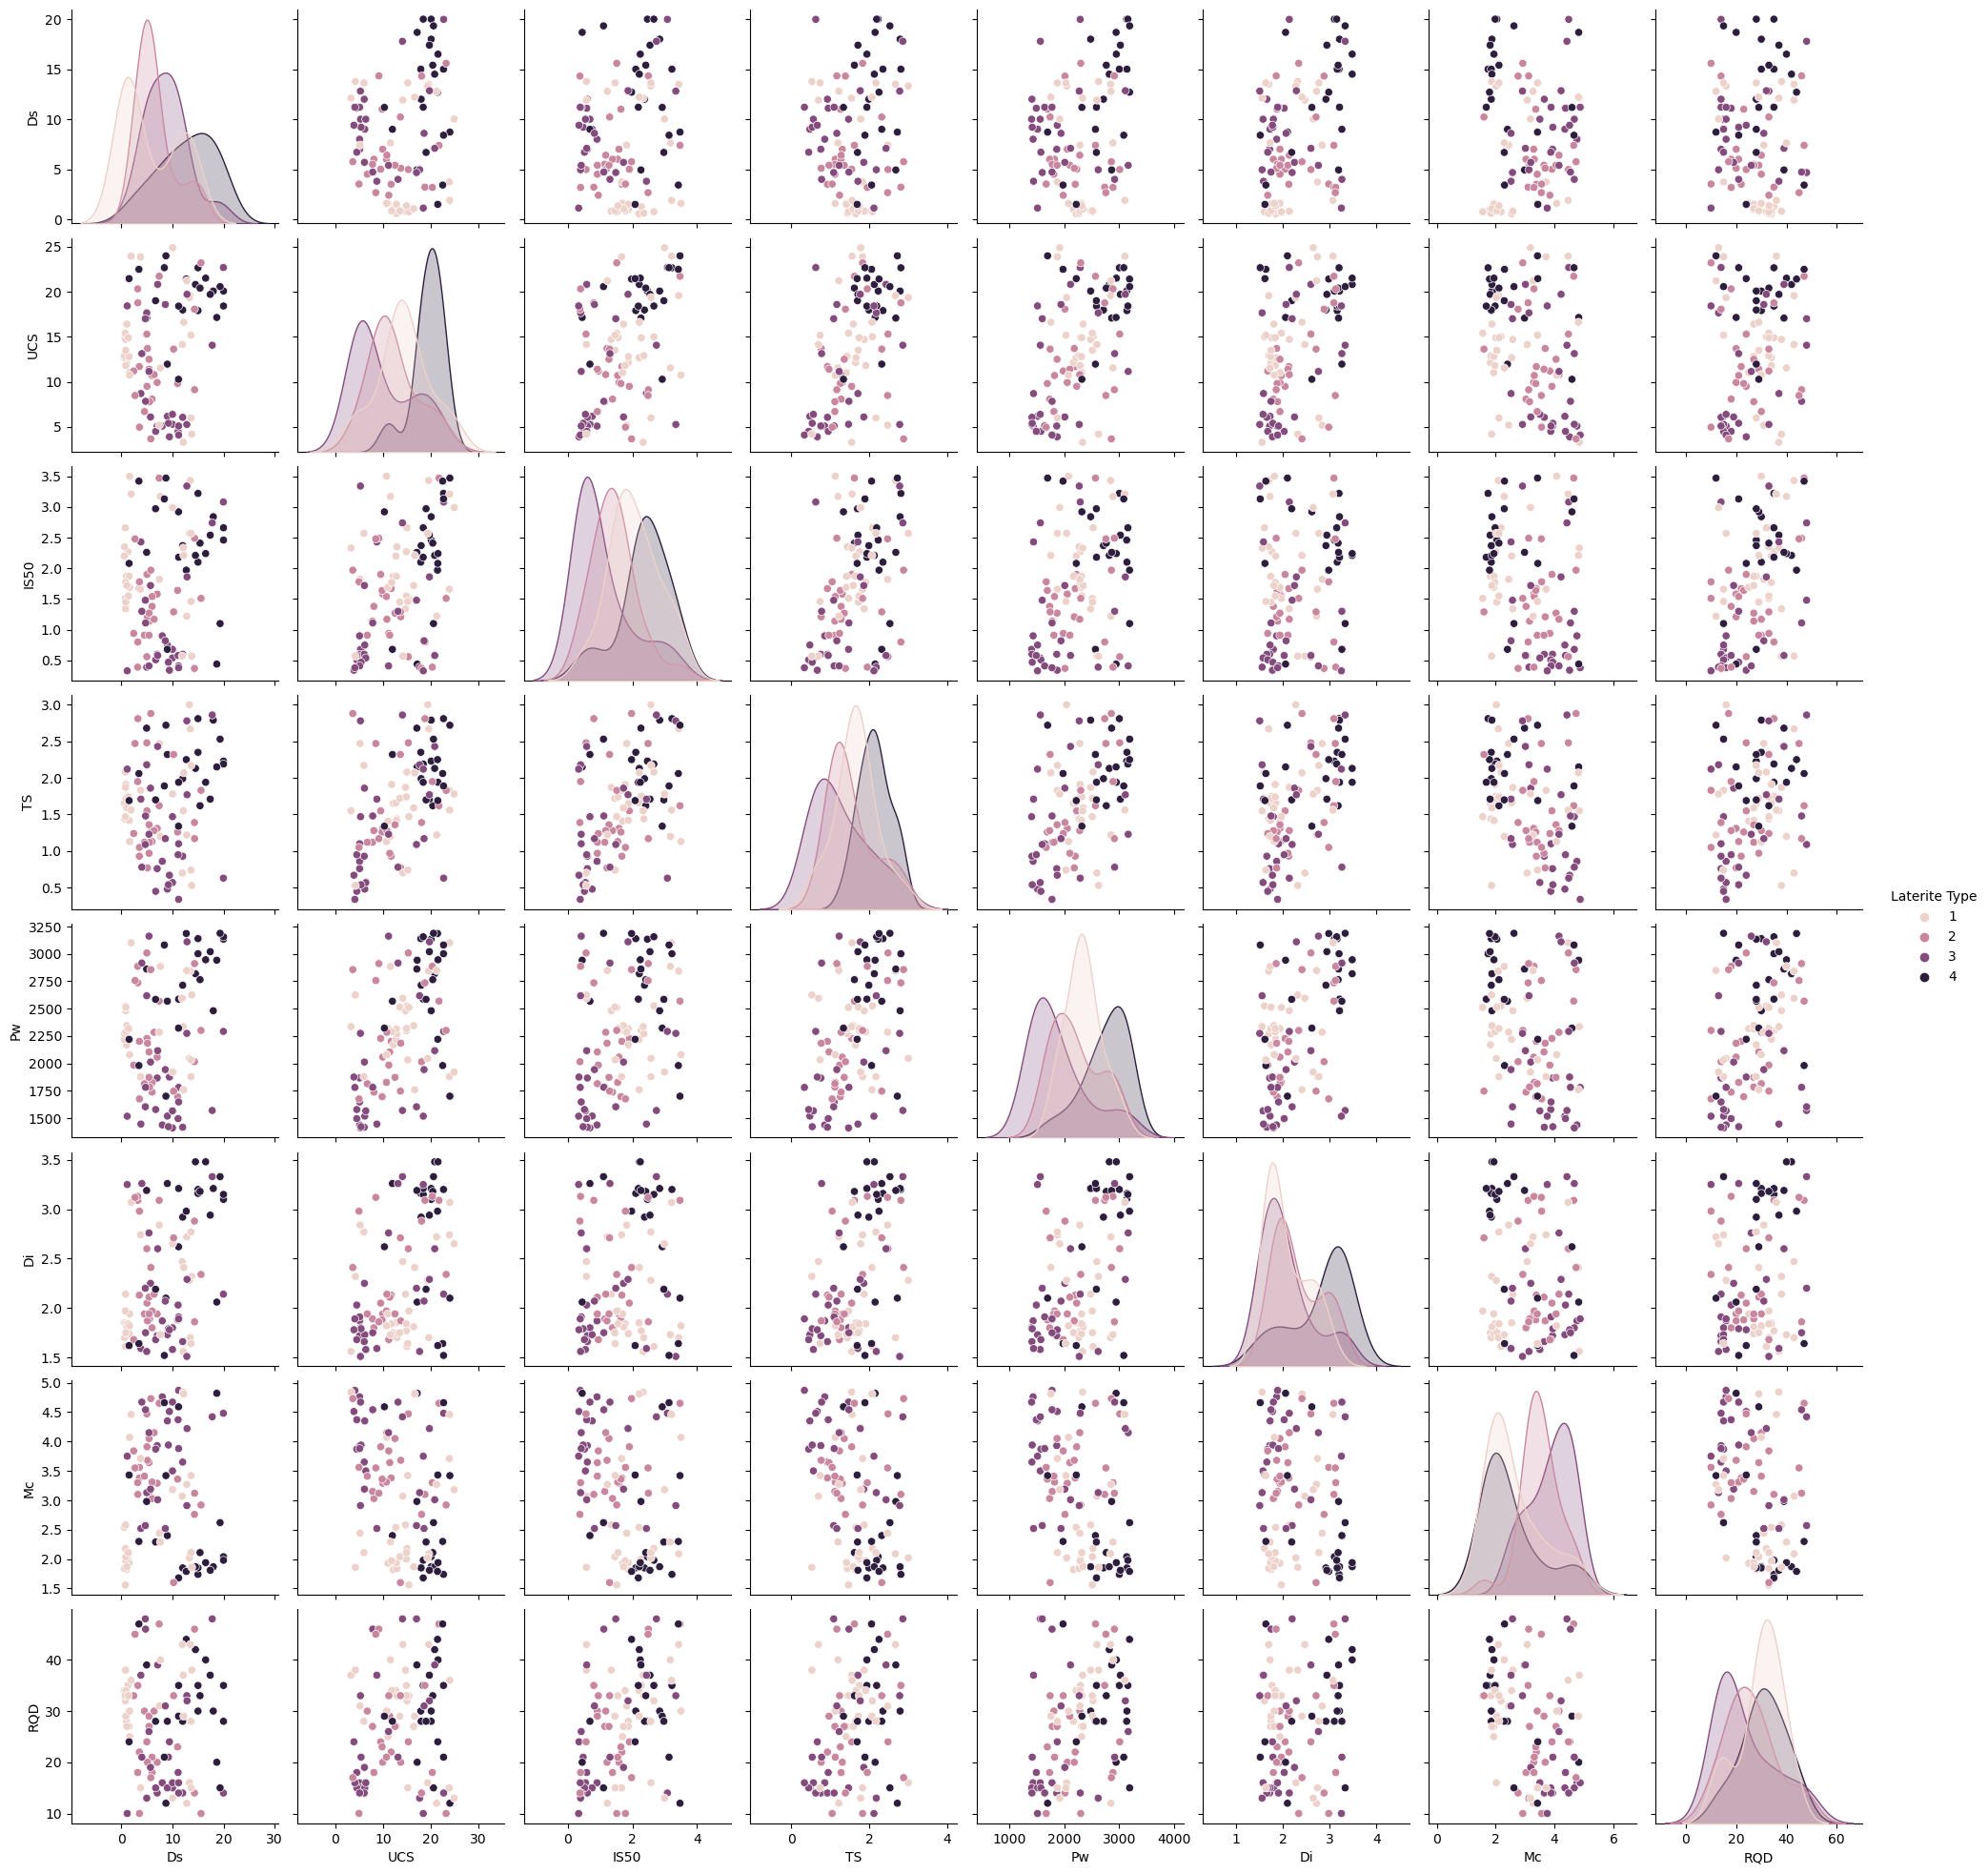

In [18]:
sns.pairplot(dataset1, hue="Laterite Type")
plt.savefig("plot3.png")
plt.show()



In [19]:
sc=StandardScaler()
sc.fit(x)

StandardScaler()

In [20]:
s=sc.transform(x)

In [21]:
s

array([[-0.44307389, -0.91898407, -0.74168468, ..., -0.79713968,
         0.684289  , -0.51753411],
       [ 0.44748347, -0.38306367, -1.43516364, ..., -1.11005687,
         1.53553451, -1.19945347],
       [ 1.33804082,  0.86741725,  1.32617208, ...,  1.20205346,
        -1.48889071,  0.420105  ],
       ...,
       [ 0.44748347, -1.02616814,  0.99437149, ...,  1.21943775,
         1.23509492, -1.62565307],
       [ 1.33804082,  0.9299413 ,  1.23968378, ..., -0.79713968,
        -1.15840715,  1.52822396],
       [ 0.44748347,  0.72093234,  1.5966446 , ...,  0.28068619,
        -0.04678067,  1.10202436]])

In [22]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [23]:
x

,Laterite Type,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
0,-0.443074,-0.918984,-0.741685,0.006550,-0.130033,-0.146182,-0.797140,0.684289,-0.517534
1,0.447483,-0.383064,-1.435164,-1.088529,-1.012168,-1.676567,-1.110057,1.535535,-1.199453
2,1.338041,0.867417,1.326172,1.452054,1.480821,1.351313,1.202053,-1.488891,0.420105
3,-1.333631,-1.588885,0.105901,0.411729,0.125658,-0.010749,-1.283900,-1.228510,0.420105
4,-0.443074,-1.186944,-0.397304,-0.245318,-0.922676,-0.198420,-0.658065,0.153512,-0.688014
...,...,...,...,...,...,...,...,...,...
5044,1.338041,0.399380,-0.834463,1.452054,1.173992,0.534849,-0.988367,0.103439,0.505345
5045,1.338041,0.588739,0.604388,-0.102958,1.276268,-1.635937,0.802215,0.644230,-1.114214
5046,0.447483,-1.026168,0.994371,-1.614166,1.583098,-1.100012,1.219438,1.235095,-1.625653
5047,1.338041,0.929941,1.239684,-1.712723,-1.485197,1.405486,-0.797140,-1.158407,1.528224


In [24]:
from sklearn.model_selection import train_test_split
x=dataset.drop(['Laterite Type'], axis=1)
y=dataset[['Laterite Type']]

In [25]:
x.head(10)

,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
0,0.75,15.00,2.66,2.08,2525,1.61,2.18,32
1,5.00,9.50,1.90,1.55,2228,2.05,3.91,24
2,8.00,5.09,0.90,0.86,1437,1.87,4.76,16
3,15.00,22.65,3.22,2.81,3002,3.20,1.74,35
4,1.25,14.89,2.27,1.75,2298,1.77,2.00,35
5,3.50,11.69,1.67,0.93,2201,2.13,3.38,22
6,10.00,5.29,0.68,1.47,1410,1.80,4.67,15
7,18.00,20.07,2.84,2.79,2481,3.21,1.87,30
8,1.00,12.14,1.87,1.65,2169,1.75,1.82,28
9,7.00,9.93,1.58,1.31,2057,1.94,3.29,20


In [26]:
y.head(10)

,Laterite Type
0,1
1,2
2,3
3,4
4,1
5,2
6,3
7,4
8,1
9,2


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [29]:
models={
    "Random Forest":RandomForestClassifier(),
    "KNNneighbour": KNeighborsClassifier(n_neighbors=5)  
}

for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train, y_train) #Train model

    #make predictionsabs
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
   
    

    #test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
   

    print(list(models.keys())[i])

    print('model performnce for Training set')
    print(" - Accuracy: {:.4f}".format(model_train_accuracy))
    print(' - F1 score: {:.4f}'.format(model_train_f1))
    print(' Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))
   

    print('......................................................')

    print('model performnce for Test set')
    print(" - Accuracy: {:.4f}".format(model_test_accuracy))
    print(' - F1 score: {:.4f}'.format(model_test_f1))
    print(' Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))
  

    print('='*35)
    print('\n')




    

    



C:\Users\Vijay Kumar\AppData\Local\Temp\ipykernel_4788\2519095744.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train) #Train model


Random Forest
model performnce for Training set
 - Accuracy: 1.0000
 - F1 score: 1.0000
 Precision: 1.0000
Recall: 1.0000
......................................................
model performnce for Test set
 - Accuracy: 0.2347
 - F1 score: 0.2354
 Precision: 0.2431
Recall: 0.2347




C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNNneighbour
model performnce for Training set
 - Accuracy: 0.4938
 - F1 score: 0.4885
 Precision: 0.4994
Recall: 0.4938
......................................................
model performnce for Test set
 - Accuracy: 0.2535
 - F1 score: 0.2463
 Precision: 0.2548
Recall: 0.2535




In [30]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Generate synthetic dataset
X, y = make_classification(
    n_samples=5050,
    n_features=20,
    n_informative=15,
    n_classes=4,  # Multiclass problem
    random_state=42
)

# One-hot encode the labels
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))
model.save("multiclass_classifier.keras", include_optimizer=False)

Epoch 1/100
101/101 [==============================] - 2s 6ms/step - loss: 1.1510 - accuracy: 0.5207 - val_loss: 0.9390 - val_accuracy: 0.6423
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.7752 - accuracy: 0.7314 - val_loss: 0.7561 - val_accuracy: 0.7203
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.7834 - val_loss: 0.6509 - val_accuracy: 0.7723
Epoch 4/100
101/101 [==============================] - 0s 4ms/step - loss: 0.5345 - accuracy: 0.8150 - val_loss: 0.5791 - val_accuracy: 0.7946
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8382 - val_loss: 0.5376 - val_accuracy: 0.8106
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8605 - val_loss: 0.4831 - val_accuracy: 0.8218
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8803 - val_loss: 0.4574 - val_accuracy: 0.8280

ValueError: The following argument(s) are not supported with the native Keras format: ['include_optimizer']

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("multiclass_classifier.keras")

# Recompile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Now you can train or evaluate the model
model.evaluate(X_test, y_test)

In [ ]:
pip show tensorflow

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras.saving.saving_lib")


In [ ]:
predictions = model.predict(X_test)

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Function to load the trained model
@st.cache_resource
def load_trained_model():
    try:
        model = load_model("multiclass_classifier.keras")  # Replace with your model file
        return model
    except Exception as e:
        st.error("Error loading the model. Ensure the 'laterite_classifier.h5' file exists.")
        st.stop()  # Stop execution if the model is not loaded

model = load_trained_model()

# Title and description
st.title("Laterite Type Classifier")
st.write("Enter the feature values to classify the type of laterite.")

# Input fields for features
st.sidebar.header("Input Features")
Ds = st.sidebar.number_input("Ds (mm)", min_value=0.0, max_value=20.0, value=5.0, step=0.1)
UCS = st.sidebar.number_input("UCS (MPa)", min_value=0.0, max_value=25.0, value=10.0, step=0.1)
IS50 = st.sidebar.number_input("IS50 (MPa)", min_value=0.0, max_value=3.5, value=1.0, step=0.01)
TS = st.sidebar.number_input("TS (MPa)", min_value=0.0, max_value=3.0, value=1.5, step=0.01)
Pw = st.sidebar.number_input("Pw (kg/m³)", min_value=1400, max_value=3200, value=2000, step=10)
Di = st.sidebar.number_input("Di (mm)", min_value=1.5, max_value=3.5, value=2.0, step=0.01)
Mc = st.sidebar.number_input("Mc (%)", min_value=1.5, max_value=5.0, value=3.0, step=0.01)
RQD = st.sidebar.number_input("RQD (%)", min_value=10, max_value=50, value=30, step=1)

# Predict button
if st.button("Classify"):
    try:
        # Prepare input for prediction
        input_features = np.array([[Ds, UCS, IS50, TS, Pw, Di, Mc, RQD]])
        
        # Make prediction
        prediction = model.predict(input_features)
        predicted_class = np.argmax(prediction)
        
        # Map class index to Laterite Type
        laterite_types = ["ILT", "LT", "LTC", "LLT"]
        result = laterite_types[predicted_class]
        
        # Display results
        st.subheader("Classification Result")
        st.write(f"The predicted Laterite Type is: **{result}**")
        st.write(f"Confidence: **{prediction[0][predicted_class]:.2f}**")
    except Exception as e:
        st.error(f"An error occurred during prediction: {e}")


In [ ]:
# Streamlit code to save as app.py
streamlit_code = """
import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Function to load the trained model
@st.cache_resource
def load_trained_model():
    try:
        model = load_model("multiclass_classifier.keras")  # Replace with your model file
        return model
    except Exception as e:
        st.error("Error loading the model. Ensure the 'laterite_classifier.h5' file exists.")
        st.stop()  # Stop execution if the model is not loaded

model = load_trained_model()

# Title and description
st.title("Laterite Type Classifier")
st.write("Enter the feature values to classify the type of laterite.")

# Input fields for features
st.sidebar.header("Input Features")
Ds = st.sidebar.number_input("Ds (mm)", min_value=0.0, max_value=20.0, value=5.0, step=0.1)
UCS = st.sidebar.number_input("UCS (MPa)", min_value=0.0, max_value=25.0, value=10.0, step=0.1)
IS50 = st.sidebar.number_input("IS50 (MPa)", min_value=0.0, max_value=3.5, value=1.0, step=0.01)
TS = st.sidebar.number_input("TS (MPa)", min_value=0.0, max_value=3.0, value=1.5, step=0.01)
Pw = st.sidebar.number_input("Pw (kg/m³)", min_value=1400, max_value=3200, value=2000, step=10)
Di = st.sidebar.number_input("Di (mm)", min_value=1.5, max_value=3.5, value=2.0, step=0.01)
Mc = st.sidebar.number_input("Mc (%)", min_value=1.5, max_value=5.0, value=3.0, step=0.01)
RQD = st.sidebar.number_input("RQD (%)", min_value=10, max_value=50, value=30, step=1)

# Predict button
if st.button("Classify"):
    try:
        # Prepare input for prediction
        input_features = np.array([[Ds, UCS, IS50, TS, Pw, Di, Mc, RQD]])
        
        # Make prediction
        prediction = model.predict(input_features)
        predicted_class = np.argmax(prediction)
        
        # Map class index to Laterite Type
        laterite_types = ["ILT", "LT", "LTC", "LLT"]
        result = laterite_types[predicted_class]
        
        # Display results
        st.subheader("Classification Result")
        st.write(f"The predicted Laterite Type is: **{result}**")
        st.write(f"Confidence: **{prediction[0][predicted_class]:.2f}**")
    except Exception as e:
        st.error(f"An error occurred during prediction: {e}")
"""

# Save to app.py
with open("app.py", "w") as file:
    file.write(streamlit_code)

print("Streamlit code has been saved as app.py")


In [ ]:
!streamlit run app.py
